Bus Fare and Ratings Correlation:

Insight: By analyzing the relationship between the bus fare and ratings, you can determine if higher fares are associated with better-rated services. This can help understand if customers are satisfied with the value they are getting for the price paid.

Occupancy and Popularity:

Insight: The number of seats available can indicate the popularity of the bus route. For instance, if many seats are available close to departure time, the route might not be very popular. Conversely, few available seats indicate high demand.

Bus Type Preference:

Insight: You can determine if certain bus types (e.g., Electric A/C Seater, Sleeper) are more popular and better rated than others. This can guide fleet expansion or upgrades.
Travel Duration Analysis:

Insight: By analyzing the duration of the trips, you can determine which routes have longer or shorter travel times. This can help in scheduling and improving operational efficiency.
Starting and Ending Times:

Insight: The starting and ending times can be analyzed to determine peak travel times. This can help in adjusting schedules to meet demand more effectively.
Starting Point Analysis:

Insight: The starting point (e.g., TIRUPATHI) can be analyzed to understand which locations are generating more traffic. This can inform decisions on where to focus marketing efforts or add more buses.
Customer Preferences and Segmentation:

Insight: By segmenting the data by bus type, fare, and ratings, you can understand different customer segments and their preferences. For example, budget-conscious travelers may prefer lower fares regardless of ratings.
Example Analysis:
Bus Fare vs. Ratings Scatter Plot:

You can plot a scatter plot of bus fares against ratings to see if there is a trend. For instance, if higher-rated buses consistently have higher fares, it suggests that customers perceive them as offering better value.
Occupancy Rate:

Calculate the occupancy rate as (Total Seats - Available Seats) / Total Seats to see how full the buses typically are. This can help in optimizing bus capacity.
Average Travel Time:

Compute the average travel time across different routes to understand which routes are more time-consuming and may need scheduling adjustments.

In [168]:
import pandas as pd
df = pd.read_csv('Andhra.csv')
df.head()

,Unnamed: 0,Names,Bus_fare,Ratings,Seats,Bus_types,Starting_time,Duration,Ending_time,Starting_point
0,0,NueGo,314,4.0,33 Seats available,Electric A/C Seater (2+2),05:00,06h 10m,11:10,TIRUPATHI (12:30Am)
1,1,FRESHBUS,489,4.6,39 Seats available,Electric A/C Seater (2+2),05:30,05h 35m,11:05,RTC Bus Stand (Sindhu Travels)
2,2,NueGo,314,3.7,44 Seats available,Electric A/C Seater (2+2),07:00,06h 10m,13:10,RTC Bus Stand (Sindhu Travels)
3,3,AdRajesh Transports,INR 1080,3.9,36 Seats available,A/C Sleeper (2+1),23:36,06h 24m,06:00,RTC Bus Stand (Sindhu Travels)
4,4,Yolo Bus,INR 299,4.9,37 Seats available,Bharat Benz A/C Seater /Sleeper (2+1),07:15,05h 58m,13:13,RTC Bus Stand(NEW DOT TRAVELS)


In [169]:
df.Bus_fare = df.Bus_fare.str.replace('INR','',regex = True).astype(float)
df.Seats = df.Seats.str.replace('Seats available','', regex= True).replace('Seat available','',regex=True).astype(float)

In [170]:
df.drop('Unnamed: 0',axis=1)

,Names,Bus_fare,Ratings,Seats,Bus_types,Starting_time,Duration,Ending_time,Starting_point
0,NueGo,314.0,4.0,33.0,Electric A/C Seater (2+2),05:00,06h 10m,11:10,TIRUPATHI (12:30Am)
1,FRESHBUS,489.0,4.6,39.0,Electric A/C Seater (2+2),05:30,05h 35m,11:05,RTC Bus Stand (Sindhu Travels)
2,NueGo,314.0,3.7,44.0,Electric A/C Seater (2+2),07:00,06h 10m,13:10,RTC Bus Stand (Sindhu Travels)
3,AdRajesh Transports,1080.0,3.9,36.0,A/C Sleeper (2+1),23:36,06h 24m,06:00,RTC Bus Stand (Sindhu Travels)
4,Yolo Bus,299.0,4.9,37.0,Bharat Benz A/C Seater /Sleeper (2+1),07:15,05h 58m,13:13,RTC Bus Stand(NEW DOT TRAVELS)
...,...,...,...,...,...,...,...,...,...
3926,VRCR Travels,525.0,3.8,25.0,A/C Seater / Sleeper (2+1),21:35,03h 10m,00:45,Anna Nagar
3927,CGR Travels,900.0,3.7,10.0,Non A/C Seater / Sleeper (2+1),20:00,05h 30m,01:30,Koyambedu
3928,VRCR Travels,425.0,2.1,17.0,Non A/C Seater / Sleeper (2+1),21:50,03h 30m,01:20,Koyambedu
3929,Meenakshi Travels (RR Group),500.0,2.1,NaN,A/C Sleeper (2+1),19:00,27h 30m,22:30,NaN


In [171]:
# Define a function to clean and convert the duration format
import re

# Define a function to clean and convert the duration format
def clean_duration(duration):
    # Handle formats like '0-16h 0-35m'
    if '-' in duration:
        parts = re.findall(r'(\d+)-?(\d+)?h', duration)
        hours = sum(int(part[1]) for part in parts)
        minutes = int(re.search(r'(\d+)-?(\d+)?m', duration).group(2))
    else:
        # Handle formats like '00h 49m' or '01h 30m'
        hours = int(re.search(r'(\d+)h', duration).group(1))
        minutes = int(re.search(r'(\d+)m', duration).group(1))

    return hours, minutes

In [172]:
df['travel_time'] = df.Duration.apply(clean_duration)
df

,Unnamed: 0,Names,Bus_fare,Ratings,Seats,Bus_types,Starting_time,Duration,Ending_time,Starting_point,travel_time
0,0,NueGo,314.0,4.0,33.0,Electric A/C Seater (2+2),05:00,06h 10m,11:10,TIRUPATHI (12:30Am),"(6, 10)"
1,1,FRESHBUS,489.0,4.6,39.0,Electric A/C Seater (2+2),05:30,05h 35m,11:05,RTC Bus Stand (Sindhu Travels),"(5, 35)"
2,2,NueGo,314.0,3.7,44.0,Electric A/C Seater (2+2),07:00,06h 10m,13:10,RTC Bus Stand (Sindhu Travels),"(6, 10)"
3,3,AdRajesh Transports,1080.0,3.9,36.0,A/C Sleeper (2+1),23:36,06h 24m,06:00,RTC Bus Stand (Sindhu Travels),"(6, 24)"
4,4,Yolo Bus,299.0,4.9,37.0,Bharat Benz A/C Seater /Sleeper (2+1),07:15,05h 58m,13:13,RTC Bus Stand(NEW DOT TRAVELS),"(5, 58)"
...,...,...,...,...,...,...,...,...,...,...,...
3926,3926,VRCR Travels,525.0,3.8,25.0,A/C Seater / Sleeper (2+1),21:35,03h 10m,00:45,Anna Nagar,"(3, 10)"
3927,3927,CGR Travels,900.0,3.7,10.0,Non A/C Seater / Sleeper (2+1),20:00,05h 30m,01:30,Koyambedu,"(5, 30)"
3928,3928,VRCR Travels,425.0,2.1,17.0,Non A/C Seater / Sleeper (2+1),21:50,03h 30m,01:20,Koyambedu,"(3, 30)"
3929,3929,Meenakshi Travels (RR Group),500.0,2.1,NaN,A/C Sleeper (2+1),19:00,27h 30m,22:30,NaN,"(27, 30)"


In [173]:
df[['hours','minutes']] = df.Duration.str.split(' ', expand = True)

In [174]:
df[['Hours', 'Minutes']] = df['Duration'].apply(lambda x: pd.Series(clean_duration(x)))

# Calculate the total time
df['Total_Hours'] = df['Hours'] + df['Minutes'] // 60
df['Total_Minutes'] = df['Total_Hours'] * 60 + df.Minutes

In [175]:
df.describe()

,Unnamed: 0,Bus_fare,Ratings,Seats,Hours,Minutes,Total_Hours,Total_Minutes
count,3931.000000,3931.000000,3833.000000,2881.000000,3931.000000,3931.000000,3931.000000,3931.000000
mean,1965.000000,966.010036,3.452518,28.072544,5.682015,24.987535,5.682015,365.908420
std,1134.926282,659.953791,0.799148,7.582826,1.909832,17.394629,1.909832,113.684879
min,0.000000,199.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000
25%,982.500000,584.000000,2.900000,24.000000,5.000000,10.000000,5.000000,300.000000
50%,1965.000000,799.000000,3.500000,28.000000,6.000000,29.000000,6.000000,361.000000
75%,2947.500000,1080.000000,4.100000,33.000000,7.000000,40.000000,7.000000,435.000000
max,3930.000000,5000.000000,5.000000,52.000000,27.000000,59.000000,27.000000,1650.000000


In [176]:
df.head()

,Unnamed: 0,Names,Bus_fare,Ratings,Seats,Bus_types,Starting_time,Duration,Ending_time,Starting_point,travel_time,hours,minutes,Hours,Minutes,Total_Hours,Total_Minutes
0,0,NueGo,314.0,4.0,33.0,Electric A/C Seater (2+2),05:00,06h 10m,11:10,TIRUPATHI (12:30Am),"(6, 10)",06h,10m,6,10,6,370
1,1,FRESHBUS,489.0,4.6,39.0,Electric A/C Seater (2+2),05:30,05h 35m,11:05,RTC Bus Stand (Sindhu Travels),"(5, 35)",05h,35m,5,35,5,335
2,2,NueGo,314.0,3.7,44.0,Electric A/C Seater (2+2),07:00,06h 10m,13:10,RTC Bus Stand (Sindhu Travels),"(6, 10)",06h,10m,6,10,6,370
3,3,AdRajesh Transports,1080.0,3.9,36.0,A/C Sleeper (2+1),23:36,06h 24m,06:00,RTC Bus Stand (Sindhu Travels),"(6, 24)",06h,24m,6,24,6,384
4,4,Yolo Bus,299.0,4.9,37.0,Bharat Benz A/C Seater /Sleeper (2+1),07:15,05h 58m,13:13,RTC Bus Stand(NEW DOT TRAVELS),"(5, 58)",05h,58m,5,58,5,358


In [177]:
df.Bus_types.value_counts()

Bus_types
A/C Sleeper (2+1)                                    1113
Non A/C Seater / Sleeper (2+1)                        968
A/C Seater / Sleeper (2+1)                            503
NON A/C Sleeper (2+1)                                 181
Electric A/C Seater (2+2)                             163
Bharat Benz A/C Sleeper (2+1)                         136
Volvo Multi-Axle A/C Sleeper (2+1)                     83
Volvo 9600 Multi-Axle A/C Sleeper (2+1)                81
NON A/C Seater/ Sleeper (2+1)                          72
Scania AC Multi Axle Sleeper (2+1)                     64
Volvo Multi Axle A/C Sleeper I-Shift B11R (2+1)        62
A/C Volvo B11R Multi-Axle Sleeper (2+1)                52
VE A/C Sleeper (2+1)                                   46
AC Sleeper (2+1)                                       41
Bharat Benz A/C Seater /Sleeper (2+1)                  37
Electric A/C Seater/Sleeper (2+1)                      35
NON AC Seater / Sleeper 2+1                            28
A/C 

In [178]:
from sklearn.preprocessing import LabelEncoder


# Label encode the bus types
label_encoder = LabelEncoder()
df['Bus_type_encoded'] = label_encoder.fit_transform(df['Bus_types'])

In [179]:
df.Starting_point.value_counts()

Starting_point
Kukatpally           331
Benz Circle          111
Marathahalli          67
RTC Bus Stand         64
Chandapura            61
                    ... 
Pr Degree College      1
Zilla Parishad         1
Sarpavaram             1
Gati PH                1
Anna Nagar             1
Name: count, Length: 419, dtype: int64

In [180]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # Remove 'INR' from Bus_fare and convert to float
    df['Bus_fare'] = df['Bus_fare'].str.replace('INR', '', regex=True).astype(float)

    # Remove 'Seats available' from Seats and convert to float
    df['Seats'] = df['Seats'].str.replace('Seats available', '', regex=True).replace('Seat available', '', regex=True).astype(float)
    
    # Drop the 'Unnamed: 0' column if it exists
    df.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)
    
    # Handle missing values
    df = df.fillna({
        'Bus_fare': df['Bus_fare'].mean(),
        'Seats': df['Seats'].mean(),
        'Hours': 0,
        'Minutes': 0,
        'Total_Hours': 0,
        'Total_Minutes': 0,
        'Ratings' : df['Ratings'].mean(),
        'Starting_point':'Not mentioned'
    })
    
    

    # Define a function to clean and convert the duration format
    def clean_duration(duration):
        if '-' in duration:
            parts = re.findall(r'(\d+)-?(\d+)?h', duration)
            hours = sum(int(part[1]) for part in parts)
            minutes = int(re.search(r'(\d+)-?(\d+)?m', duration).group(2))
        else:
            hours = int(re.search(r'(\d+)h', duration).group(1))
            minutes = int(re.search(r'(\d+)m', duration).group(1))
        return hours, minutes

    # Apply the clean_duration function to the Duration column
    df[['Hours', 'Minutes']] = df['Duration'].apply(lambda x: pd.Series(clean_duration(x)))

    # Calculate the total time in minutes
    df['Total_Hours'] = df['Hours'] + df['Minutes'] // 60
    df['Total_Minutes'] = df['Total_Hours'] * 60 + df['Minutes'] % 60

    # Label encode the bus types
    label_encoder = LabelEncoder()
    df['Bus_type_encoded'] = label_encoder.fit_transform(df['Bus_types'])
    df['Starting_point_encoded'] = label_encoder.fit_transform(df['Starting_point'])
    

    return df


In [181]:
!pip install --upgrade pandas

In [182]:
kerala_df = pd.read_csv('kerala.csv')
kerala_df.Starting_point.value_counts()
kerala_df.isna().sum()

Unnamed: 0          0
Names               0
Bus_fare            0
Ratings            39
Seats             112
Bus_types           0
Starting_time       0
Duration            0
Ending_time         0
Starting_point    129
dtype: int64

In [183]:
kerala_df = preprocess_data(kerala_df)
kerala_df.isna().sum()

Names                     0
Bus_fare                  0
Ratings                   0
Seats                     0
Bus_types                 0
Starting_time             0
Duration                  0
Ending_time               0
Starting_point            0
Hours                     0
Minutes                   0
Total_Hours               0
Total_Minutes             0
Bus_type_encoded          0
Starting_point_encoded    0
dtype: int64

In [184]:
kerala_df.Starting_point_encoded.value_counts()

Starting_point_encoded
52    129
24     44
6      42
43     28
34     13
     ... 
73      1
17      1
74      1
13      1
31      1
Name: count, Length: 80, dtype: int64

In [185]:
kerala_df

,Names,Bus_fare,Ratings,Seats,Bus_types,Starting_time,Duration,Ending_time,Starting_point,Hours,Minutes,Total_Hours,Total_Minutes,Bus_type_encoded,Starting_point_encoded
0,Kyros Connect,250.0,4.100000,24.831361,Bharat Benz A/C Semi Sleeper (2+2),12:15,02h 10m,14:25,Not mentioned,2,10,2,130,9,52
1,Kyros Connect,250.0,4.100000,24.831361,Bharat Benz A/C Semi Sleeper (2+2),12:15,03h 25m,15:40,Not mentioned,3,25,3,205,9,52
2,Cochin Express,800.0,4.000000,24.831361,A/C Sleeper (2+1),02:30,02h 15m,04:45,Not mentioned,2,15,2,135,6,52
3,Deer Bus LLP,700.0,4.000000,24.831361,VE A/C Semi Sleeper (2+2),08:00,02h 00m,10:00,Not mentioned,2,0,2,120,22,52
4,Cochin Express,800.0,3.200000,24.831361,A/C Sleeper (2+1),02:30,02h 45m,05:15,Not mentioned,2,45,2,165,6,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Sam Tourist,1999.0,3.615328,24.831361,A/C Sleeper (2+1),23:59,05h 01m,05:00,Not mentioned,5,1,5,301,6,52
446,RAVINA TRAVELS,1079.0,3.615328,24.831361,A/C Sleeper (2+1),14:35,05h 25m,20:00,Not mentioned,5,25,5,325,6,52
447,Kingfisher Connect,3000.0,3.615328,24.831361,Non A/C Seater / Sleeper (2+1),21:00,06h 20m,03:20,Not mentioned,6,20,6,380,17,52
448,Maaruti Travels,999.0,3.615328,24.831361,NON A/C Semi Sleeper / Sleeper (2+1),23:45,06h 15m,06:00,Not mentioned,6,15,6,375,14,52


In [186]:

andhra_df = pd.read_csv('Andhra.csv')
andhra_df = preprocess_data(andhra_df)
andhra_df.head()

,Names,Bus_fare,Ratings,Seats,Bus_types,Starting_time,Duration,Ending_time,Starting_point,Hours,Minutes,Total_Hours,Total_Minutes,Bus_type_encoded,Starting_point_encoded
0,NueGo,314.0,4.0,33.0,Electric A/C Seater (2+2),05:00,06h 10m,11:10,TIRUPATHI (12:30Am),6,10,6,370,11,371
1,FRESHBUS,489.0,4.6,39.0,Electric A/C Seater (2+2),05:30,05h 35m,11:05,RTC Bus Stand (Sindhu Travels),5,35,5,335,11,315
2,NueGo,314.0,3.7,44.0,Electric A/C Seater (2+2),07:00,06h 10m,13:10,RTC Bus Stand (Sindhu Travels),6,10,6,370,11,315
3,AdRajesh Transports,1080.0,3.9,36.0,A/C Sleeper (2+1),23:36,06h 24m,06:00,RTC Bus Stand (Sindhu Travels),6,24,6,384,5,315
4,Yolo Bus,299.0,4.9,37.0,Bharat Benz A/C Seater /Sleeper (2+1),07:15,05h 58m,13:13,RTC Bus Stand(NEW DOT TRAVELS),5,58,5,358,9,317


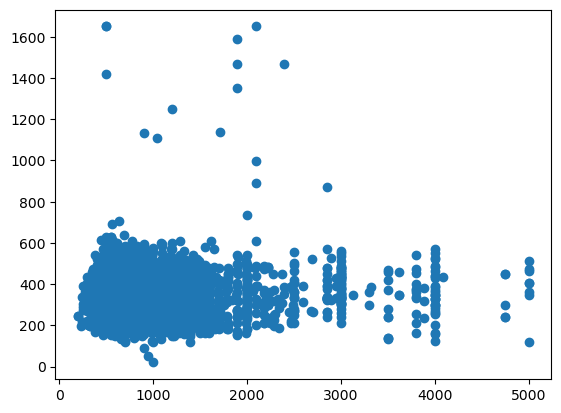

In [187]:
import matplotlib.pyplot as plt
plt.scatter(andhra_df['Bus_fare'],andhra_df['Total_Minutes'])

In [188]:
andhra_df.Total_Minutes.corr(andhra_df['Bus_fare'])

-0.026261968618375035

In [189]:
import numpy as np
numerical_andhra_df = andhra_df.select_dtypes(include = 'number')
numerical_andhra_df

,Bus_fare,Ratings,Seats,Hours,Minutes,Total_Hours,Total_Minutes,Bus_type_encoded,Starting_point_encoded
0,314.0,4.000000,33.000000,6,10,6,370,11,371
1,489.0,4.600000,39.000000,5,35,5,335,11,315
2,314.0,3.700000,44.000000,6,10,6,370,11,315
3,1080.0,3.900000,36.000000,6,24,6,384,5,315
4,299.0,4.900000,37.000000,5,58,5,358,9,317
...,...,...,...,...,...,...,...,...,...
3926,525.0,3.800000,25.000000,3,10,3,190,1,20
3927,900.0,3.700000,10.000000,5,30,5,330,32,187
3928,425.0,2.100000,17.000000,3,30,3,210,32,187
3929,500.0,2.100000,28.072544,27,30,27,1650,5,282


In [190]:
corr_andhra_df = numerical_andhra_df.corr()

In [264]:
corr_andhra_df

,Bus_fare,Ratings,Seats,Hours,Minutes,Total_Hours,Total_Minutes,Bus_type_encoded,Starting_point_encoded
Bus_fare,1.000000,-0.165119,-0.004434,-0.025128,-0.006104,-0.025128,-0.026262,-0.032387,0.073175
Ratings,-0.165119,1.000000,-0.034617,-0.055031,0.022826,-0.055031,-0.051976,-0.067521,-0.082744
Seats,-0.004434,-0.034617,1.000000,-0.003919,-0.009468,-0.003919,-0.005399,-0.005872,0.001754
Hours,-0.025128,-0.055031,-0.003919,1.000000,-0.127726,1.000000,0.988418,0.014080,-0.111941
Minutes,-0.006104,0.022826,-0.009468,-0.127726,1.000000,-0.127726,0.024265,-0.022184,-0.002247
Total_Hours,-0.025128,-0.055031,-0.003919,1.000000,-0.127726,1.000000,0.988418,0.014080,-0.111941
Total_Minutes,-0.026262,-0.051976,-0.005399,0.988418,0.024265,0.988418,1.000000,0.010798,-0.113176
Bus_type_encoded,-0.032387,-0.067521,-0.005872,0.014080,-0.022184,0.014080,0.010798,1.000000,-0.026974
Starting_point_encoded,0.073175,-0.082744,0.001754,-0.111941,-0.002247,-0.111941,-0.113176,-0.026974,1.000000


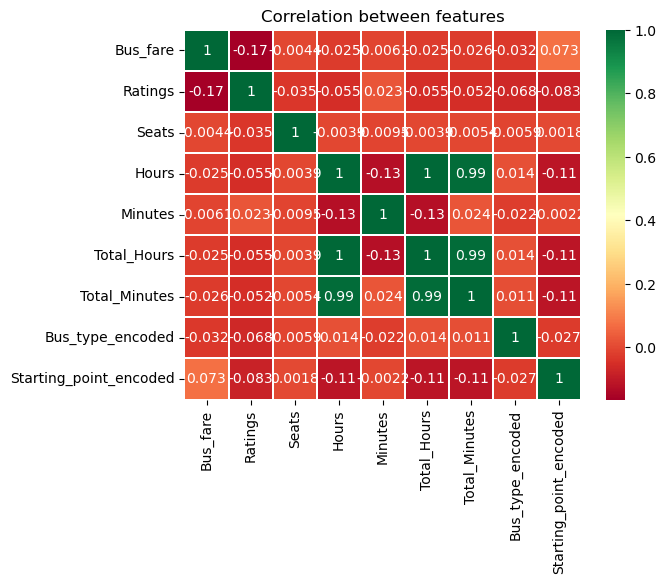

In [263]:
import seaborn as sns
sns.heatmap(corr_andhra_df, cmap ='RdYlGn', linewidths = 0.30, annot = True)
plt.title('Correlation between features');

In [192]:
# Categorizing buses into AC and Non-AC
andhra_df['AC_Type'] = andhra_df['Bus_types'].apply(lambda x: 'NON' if 'Non AC' in x else 'AC')

# View the first few rows to ensure the categorization is correct
andhra_df.AC_Type.value_counts()


AC_Type
AC     3916
NON      15
Name: count, dtype: int64

In [2]:
import pandas as pd


# Function to categorize time into hourly intervals
def categorize_hourly_interval(time_str):
    try:
        time_obj = pd.to_datetime(time_str, format='%H:%M')
        hour = time_obj.hour
        if hour == 23:
            return '23:00 - 00:00'
        else:
            return f'{hour:02d}:00 - {hour+1:02d}:00'
    except Exception as e:
        return 'Invalid Time'

# Apply the function to both Starting_time and Ending_time
andhra_df['Starting_time_interval'] = andhra_df['Starting_time'].apply(categorize_hourly_interval)
andhra_df['Ending_time_interval'] = andhra_df['Ending_time'].apply(categorize_hourly_interval)

# Display the DataFrame
print(andhra_df)


  Starting_time Ending_time Starting_time_interval Ending_time_interval
0         05:45       09:45          05:00 - 06:00        09:00 - 10:00
1         06:30       08:30          06:00 - 07:00        08:00 - 09:00
2         14:15       18:15          14:00 - 15:00        18:00 - 19:00
3         18:00       22:00          18:00 - 19:00        22:00 - 23:00
4         23:50       03:50          23:00 - 00:00        03:00 - 04:00


In [193]:
import re

# Define the function to categorize bus types
def ac_non(bus_type):
    pattern = '^NON'
    if re.findall(pattern, bus_type):
        return 'Non A/C'
    else:
        return 'A/C'

# Apply the function to the 'Bus_types' column
andhra_df['AC_Type'] = andhra_df['Bus_types'].apply(ac_non)

# View the result
andhra_df.AC_Type.value_counts()


AC_Type
A/C        3574
Non A/C     357
Name: count, dtype: int64

In [266]:
# Calculate average remaining seats by bus type and AC type
avg_seats_by_type = andhra_df.groupby(['Bus_types', 'AC_Type'])['Seats'].mean().reset_index()
avg_seats_by_type.columns = ['Bus Type', 'AC Type', 'Average Remaining Seats']

# View the result
avg_seats_by_type.sort_values(by='Average Remaining Seats',ascending = True).head(5)

,Bus Type,AC Type,Average Remaining Seats
49,Volvo Multi Axle B11R AC Seater\Sleeper (2+1),A/C,20.000000
21,NON A/C Seater (2+3),Non A/C,20.444444
55,Volvo Multi-Axle B9R A/c Semi Sleeper (2+2),A/C,21.000000
41,VE Executive A/C Sleeper (1+1),A/C,21.690848
46,Volvo A/C Sleeper (2+1),A/C,23.110694


In [267]:
andhra_df

,Names,Bus_fare,Ratings,Seats,Bus_types,Starting_time,Duration,Ending_time,Starting_point,Hours,...,Bus_type_encoded,Starting_point_encoded,AC_Type,time_until_departure,Starting_hour,Ending_hour,fare_segment,Rating_segment,Total_seats,Occupancy_rate
0,NueGo,314.0,4.000000,33.000000,Electric A/C Seater (2+2),2024-06-21 05:00:00,06h 10m,11:10,TIRUPATHI (12:30Am),6,...,11,371,A/C,-15.000000,5,11,Cheap,Medium,50,34.00
1,FRESHBUS,489.0,4.600000,39.000000,Electric A/C Seater (2+2),2024-06-21 05:30:00,05h 35m,11:05,RTC Bus Stand (Sindhu Travels),5,...,11,315,A/C,-14.500000,5,11,Cheap,High,50,22.00
2,NueGo,314.0,3.700000,44.000000,Electric A/C Seater (2+2),2024-06-21 07:00:00,06h 10m,13:10,RTC Bus Stand (Sindhu Travels),6,...,11,315,A/C,-13.000000,7,13,Cheap,Medium,50,12.00
3,AdRajesh Transports,1080.0,3.900000,36.000000,A/C Sleeper (2+1),2024-06-21 23:36:00,06h 24m,06:00,RTC Bus Stand (Sindhu Travels),6,...,5,315,A/C,3.600000,23,6,Costly,Medium,50,28.00
4,Yolo Bus,299.0,4.900000,37.000000,Bharat Benz A/C Seater /Sleeper (2+1),2024-06-21 07:15:00,05h 58m,13:13,RTC Bus Stand(NEW DOT TRAVELS),5,...,9,317,A/C,-12.750000,7,13,Cheap,High,50,26.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3926,VRCR Travels,525.0,3.800000,25.000000,A/C Seater / Sleeper (2+1),2024-06-21 21:35:00,03h 10m,00:45,Anna Nagar,3,...,1,20,A/C,1.583333,21,0,Medium,Medium,50,50.00
3927,CGR Travels,900.0,3.700000,10.000000,Non A/C Seater / Sleeper (2+1),2024-06-21 20:00:00,05h 30m,01:30,Koyambedu,5,...,32,187,A/C,0.000000,20,1,Medium,Medium,50,80.00
3928,VRCR Travels,425.0,2.100000,17.000000,Non A/C Seater / Sleeper (2+1),2024-06-21 21:50:00,03h 30m,01:20,Koyambedu,3,...,32,187,A/C,1.833333,21,1,Cheap,Low,50,66.00
3929,Meenakshi Travels (RR Group),500.0,2.100000,28.072544,A/C Sleeper (2+1),2024-06-21 19:00:00,27h 30m,22:30,Not mentioned,27,...,5,282,A/C,-1.000000,19,22,Cheap,Low,50,43.85


In [195]:
# Convert departure_time to datetime if not already
andhra_df['Starting_time'] = pd.to_datetime(df['Starting_time'])

# Calculate the time remaining until departure
current_time = pd.Timestamp('2024-06-21 20:00')

andhra_df['time_until_departure'] = (andhra_df['Starting_time'] - current_time).dt.total_seconds() / 3600  # time until departure in hours

# Analyze seats remaining close to departure (e.g., within 2 hours)
seats_close_to_departure = andhra_df[andhra_df['time_until_departure'] < 2].groupby('AC_Type')['Seats'].mean().reset_index()
seats_close_to_departure.columns = ['AC Type', 'Average Remaining Seats Close to Departure']

# View the result
seats_close_to_departure


C:\Users\Hp\AppData\Local\Temp\ipykernel_17372\1493426074.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  andhra_df['Starting_time'] = pd.to_datetime(df['Starting_time'])


,AC Type,Average Remaining Seats Close to Departure
0,A/C,28.270569
1,Non A/C,26.374459


In [196]:
current_time = pd.Timestamp.now()
current_time

Timestamp('2024-06-21 16:31:17.168681')


Bus Type Preference:

Insight: You can determine if certain bus types (e.g., Electric A/C Seater, Sleeper) are more popular and better rated than others. This can guide fleet expansion or upgrades.

In [270]:
# Calculate average remaining seats and ratings for each bus type
popularity_ratings = andhra_df.groupby('Bus_types').agg(
    Average_Remaining_Seats=('Seats', 'mean'),
    Average_Ratings=('Ratings', 'mean')
).reset_index()

# Sort by popularity (ascending average remaining seats) and ratings (descending average ratings)
popularity_ratings = popularity_ratings.sort_values(by=['Average_Remaining_Seats', 'Average_Ratings'], ascending=[True, False])

# View the result
popularity_ratings.sort_values('Average_Remaining_Seats',ascending=True)

,Bus_types,Average_Remaining_Seats,Average_Ratings
49,Volvo Multi Axle B11R AC Seater\Sleeper (2+1),20.000000,3.500000
21,NON A/C Seater (2+3),20.444444,3.100000
55,Volvo Multi-Axle B9R A/c Semi Sleeper (2+2),21.000000,3.200000
41,VE Executive A/C Sleeper (1+1),21.690848,3.900000
46,Volvo A/C Sleeper (2+1),23.110694,3.136364
58,Volvo Multi-Axle Sleeper A/C (2+1),23.483099,3.461905
51,Volvo Multi Axle Sleeper B11R (2+1),25.152204,3.225000
27,NON A/C Semi Sleeper (2+2),25.666667,3.350000
50,Volvo Multi Axle B9R A/C Sleeper (2+1),25.862374,2.765782
16,NON A/C Executive (2+1),26.000000,3.900000


Starting and Ending Times:

Insight: The starting and ending times can be analyzed to determine peak travel times. This can help in adjusting schedules to meet demand more effectively.

In [198]:
andhra_df.dtypes

Names                             object
Bus_fare                         float64
Ratings                          float64
Seats                            float64
Bus_types                         object
Starting_time             datetime64[ns]
Duration                          object
Ending_time                       object
Starting_point                    object
Hours                              int64
Minutes                            int64
Total_Hours                        int64
Total_Minutes                      int64
Bus_type_encoded                   int32
Starting_point_encoded             int32
AC_Type                           object
time_until_departure             float64
dtype: object

In [199]:
andhra_df['Starting_hour'] = andhra_df.Starting_time.dt.hour
andhra_df['Ending_hour'] = pd.to_datetime(andhra_df['Ending_time'], format='%H:%M').dt.hour
#andhra_df['Ending_hour'] = andhra_df.Ending_time.dt.hour

In [200]:
starting_hour_counts = andhra_df['Starting_hour'].value_counts().sort_index()
ending_hour_counts = andhra_df['Ending_hour'].value_counts().sort_index()

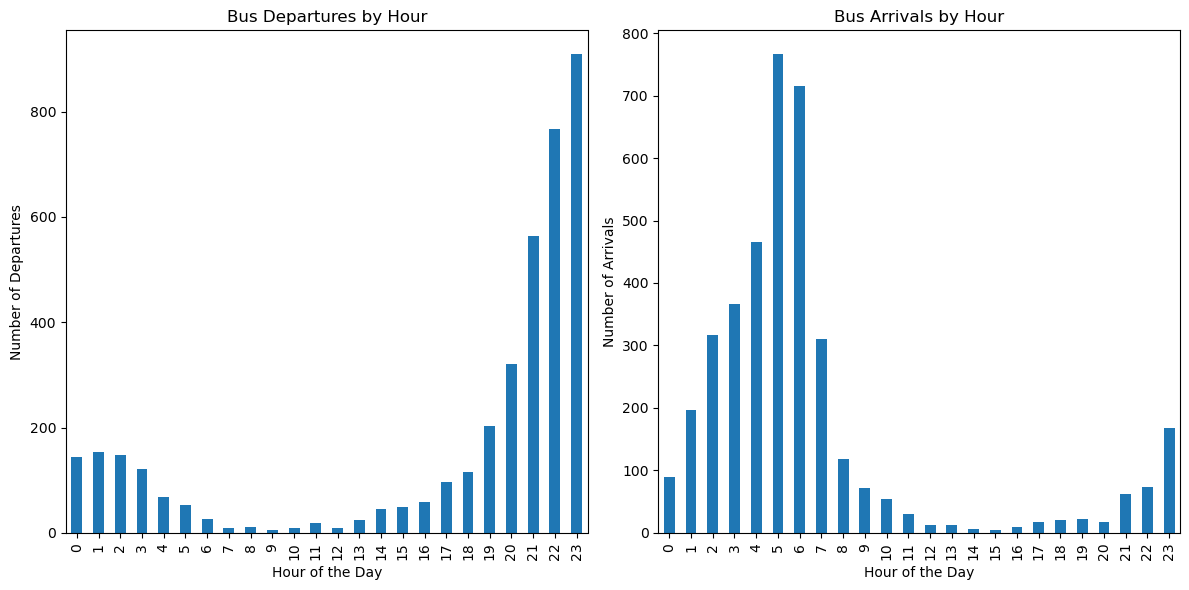

In [201]:
# Plot starting hours
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
starting_hour_counts.plot(kind='bar')
plt.title('Bus Departures by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Departures')

# Plot ending hours
plt.subplot(1, 2, 2)
ending_hour_counts.plot(kind='bar')
plt.title('Bus Arrivals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Arrivals')

plt.tight_layout()
plt.show()


Starting Point Analysis:

Insight: The starting point (e.g., TIRUPATHI) can be analyzed to understand which locations are generating more traffic. This can inform decisions on where to focus marketing efforts or add more buses.

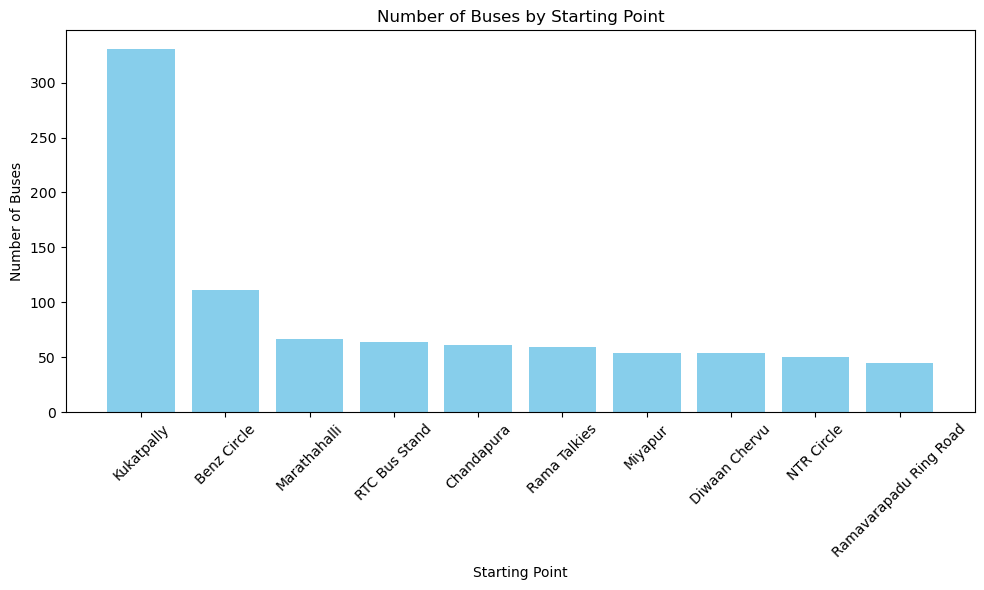

In [202]:

# Group by starting point and count the number of buses
starting_point_counts = andhra_df['Starting_point'].value_counts().reset_index()
starting_point_counts.columns = ['Starting Point', 'Number of Buses']

# Sort the data by the number of buses
starting_point_counts = starting_point_counts.sort_values(by='Number of Buses', ascending=False)
starting_point_counts = starting_point_counts[starting_point_counts['Starting Point']!='Not mentioned'].head(10)

# Plot the starting points
plt.figure(figsize=(10, 6))
plt.bar(starting_point_counts['Starting Point'], starting_point_counts['Number of Buses'], color='skyblue')
plt.title('Number of Buses by Starting Point')
plt.xlabel('Starting Point')
plt.ylabel('Number of Buses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Customer Preferences and Segmentation:

Insight: By segmenting the data by bus type, fare, and ratings, you can understand different customer segments and their preferences. For example, budget-conscious travelers may prefer lower fares regardless of ratings.

In [203]:
def fare_segment(x):
    if x > 1000:
        return 'Costly'
    elif x > 500 and x<1000:
        return 'Medium'
    else:
        return 'Cheap'
    
def rating_segment(rating):
    if rating < 3:
        return 'Low'
    elif rating <= 4:
        return 'Medium'
    else:
        return 'High'

In [204]:
andhra_df.Bus_fare.astype('float')
andhra_df.Ratings.astype('float')
andhra_df['fare_segment'] = andhra_df.Bus_fare.apply(fare_segment)
andhra_df['fare_segment'].value_counts()
andhra_df['Rating_segment'] = andhra_df.Ratings.apply(rating_segment)


In [207]:
andhra_df['Rating_segment'].value_counts()

Rating_segment
Medium    1970
Low        991
High       970
Name: count, dtype: int64

In [208]:
andhra_df

,Names,Bus_fare,Ratings,Seats,Bus_types,Starting_time,Duration,Ending_time,Starting_point,Hours,...,Total_Hours,Total_Minutes,Bus_type_encoded,Starting_point_encoded,AC_Type,time_until_departure,Starting_hour,Ending_hour,fare_segment,Rating_segment
0,NueGo,314.0,4.000000,33.000000,Electric A/C Seater (2+2),2024-06-21 05:00:00,06h 10m,11:10,TIRUPATHI (12:30Am),6,...,6,370,11,371,A/C,-15.000000,5,11,Cheap,Medium
1,FRESHBUS,489.0,4.600000,39.000000,Electric A/C Seater (2+2),2024-06-21 05:30:00,05h 35m,11:05,RTC Bus Stand (Sindhu Travels),5,...,5,335,11,315,A/C,-14.500000,5,11,Cheap,High
2,NueGo,314.0,3.700000,44.000000,Electric A/C Seater (2+2),2024-06-21 07:00:00,06h 10m,13:10,RTC Bus Stand (Sindhu Travels),6,...,6,370,11,315,A/C,-13.000000,7,13,Cheap,Medium
3,AdRajesh Transports,1080.0,3.900000,36.000000,A/C Sleeper (2+1),2024-06-21 23:36:00,06h 24m,06:00,RTC Bus Stand (Sindhu Travels),6,...,6,384,5,315,A/C,3.600000,23,6,Costly,Medium
4,Yolo Bus,299.0,4.900000,37.000000,Bharat Benz A/C Seater /Sleeper (2+1),2024-06-21 07:15:00,05h 58m,13:13,RTC Bus Stand(NEW DOT TRAVELS),5,...,5,358,9,317,A/C,-12.750000,7,13,Cheap,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3926,VRCR Travels,525.0,3.800000,25.000000,A/C Seater / Sleeper (2+1),2024-06-21 21:35:00,03h 10m,00:45,Anna Nagar,3,...,3,190,1,20,A/C,1.583333,21,0,Medium,Medium
3927,CGR Travels,900.0,3.700000,10.000000,Non A/C Seater / Sleeper (2+1),2024-06-21 20:00:00,05h 30m,01:30,Koyambedu,5,...,5,330,32,187,A/C,0.000000,20,1,Medium,Medium
3928,VRCR Travels,425.0,2.100000,17.000000,Non A/C Seater / Sleeper (2+1),2024-06-21 21:50:00,03h 30m,01:20,Koyambedu,3,...,3,210,32,187,A/C,1.833333,21,1,Cheap,Low
3929,Meenakshi Travels (RR Group),500.0,2.100000,28.072544,A/C Sleeper (2+1),2024-06-21 19:00:00,27h 30m,22:30,Not mentioned,27,...,27,1650,5,282,A/C,-1.000000,19,22,Cheap,Low


In [212]:
bus_type_analysis = andhra_df.groupby('Bus_types').agg({'Bus_fare':'mean','Ratings':'mean'}).reset_index()
fare_segment_analysis = andhra_df.groupby('fare_segment').agg({'Bus_fare':'mean','Ratings':'mean'}).reset_index()
ratings_segment_analysis = andhra_df.groupby('Rating_segment').agg({'Bus_fare':'mean','Ratings':'mean'}).reset_index()
ratings_segment_analysis

,Rating_segment,Bus_fare,Ratings
0,High,848.226804,4.392268
1,Low,1127.096872,2.391625
2,Medium,942.970787,3.523475


<Axes: >

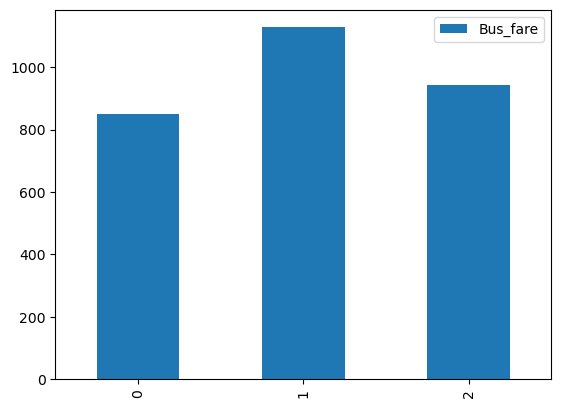

In [234]:
ratings_segment_analysis[['Rating_segment','Bus_fare']].plot(kind='bar')

In [227]:
from sklearn.preprocessing import StandardScaler

data = fare_segment_analysis[['Bus_fare','Ratings']]
scaler = StandardScaler()
scaler.fit(data)
scaler.transform(data)

array([[-0.90256633,  1.04139246],
       [ 1.39416731, -1.3493254 ],
       [-0.49160098,  0.30793295]])

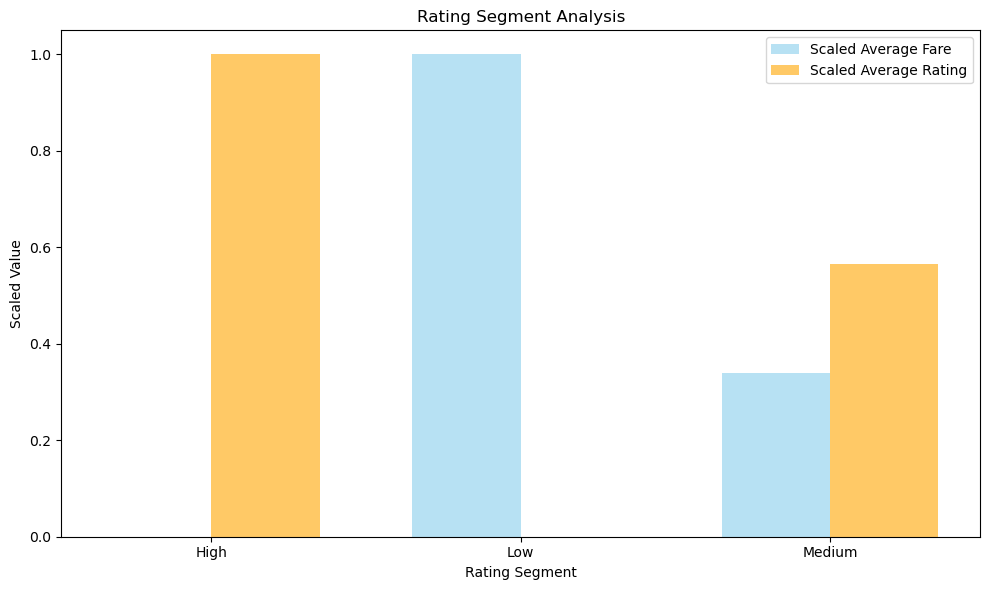

In [232]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Prepare data
labels = ratings_segment_analysis['Rating_segment']
bus_fare_means = ratings_segment_analysis['Bus_fare'].values.reshape(-1, 1)
ratings_means = ratings_segment_analysis['Ratings'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
bus_fare_scaled = scaler.fit_transform(bus_fare_means).flatten()
ratings_scaled = scaler.fit_transform(ratings_means).flatten()

# Plot data
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, bus_fare_scaled, width, label='Scaled Average Fare', color='skyblue', alpha=0.6)
rects2 = ax.bar(x + width/2, ratings_scaled, width, label='Scaled Average Rating', color='orange', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Rating Segment')
ax.set_ylabel('Scaled Value')
ax.set_title('Rating Segment Analysis')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


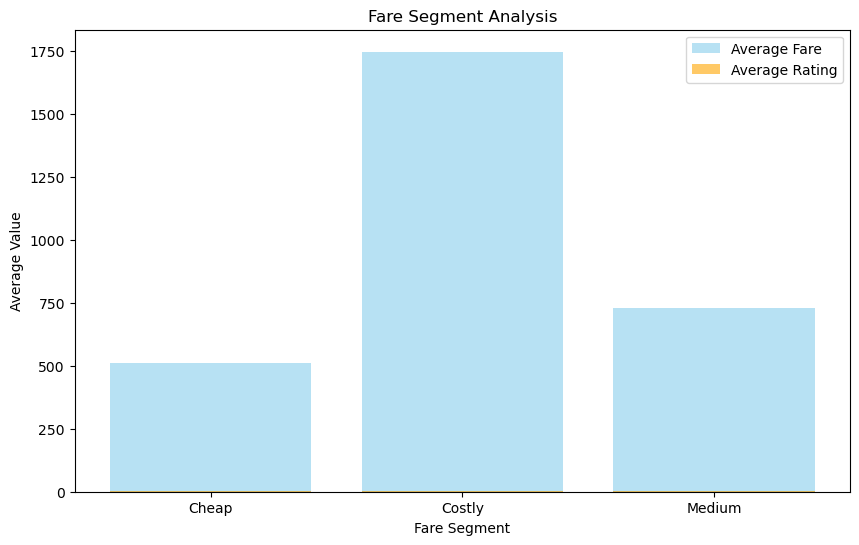

In [228]:
plt.figure(figsize=(10, 6))
plt.bar(fare_segment_analysis['fare_segment'], fare_segment_analysis['Bus_fare'], color='skyblue', alpha=0.6, label='Average Fare')
plt.bar(fare_segment_analysis['fare_segment'], fare_segment_analysis['Ratings'], color='orange', alpha=0.6, label='Average Rating')
plt.title('Fare Segment Analysis')
plt.xlabel('Fare Segment')
plt.ylabel('Average Value')
plt.legend()
plt.show()

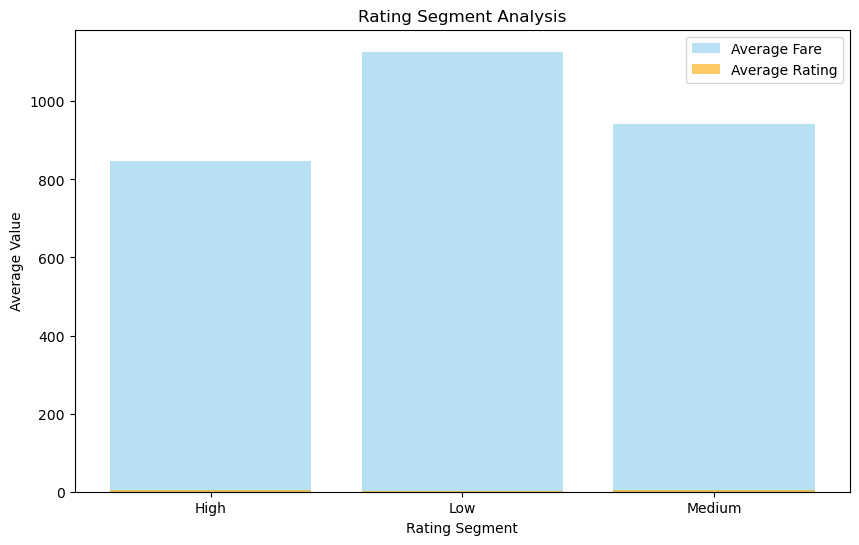

In [219]:
plt.figure(figsize=(10, 6))
plt.bar(ratings_segment_analysis['Rating_segment'], ratings_segment_analysis['Bus_fare'], color='skyblue', alpha=0.6, label='Average Fare')
plt.bar(ratings_segment_analysis['Rating_segment'], ratings_segment_analysis['Ratings'], color='orange', alpha=0.6, label='Average Rating')
plt.title('Rating Segment Analysis')
plt.xlabel('Rating Segment')
plt.ylabel('Average Value')
plt.legend()
plt.show()

Occupancy Rate:

Calculate the occupancy rate as (Total Seats - Available Seats) / Total Seats to see how full the buses typically are. This can help in optimizing bus capacity.

In [236]:
andhra_df['Total_seats'] = 50

In [260]:
andhra_df['Occupancy_rate'] = round((andhra_df['Total_seats'] - andhra_df['Seats'])/andhra_df['Total_seats']*100,2)

In [274]:
pdf = andhra_df[['Names','Occupancy_rate']].value_counts().head(10)
pdf = pd.DataFrame(pdf)
pdf

,,count
Names,Occupancy_rate,
Morning Star Travels,43.85,62
Sri Tulasi Tours and Travels,43.85,43
Yolo Bus,43.85,30
IRA Travels,43.85,23
True Bus,43.85,21
Go Tour Travels and Holidays,43.85,21
Sri Krishna Travels,43.85,20
Bmcc Travels,43.85,17
Sai Sri Durga Travels,43.85,16


In [258]:
occupancy_df = andhra_df.sort_values(by=['Occupancy_rate'],ascending=False).head(10)
occupancy_df.Occupancy_rate.value_counts()

Occupancy_rate
98.0    10
Name: count, dtype: int64

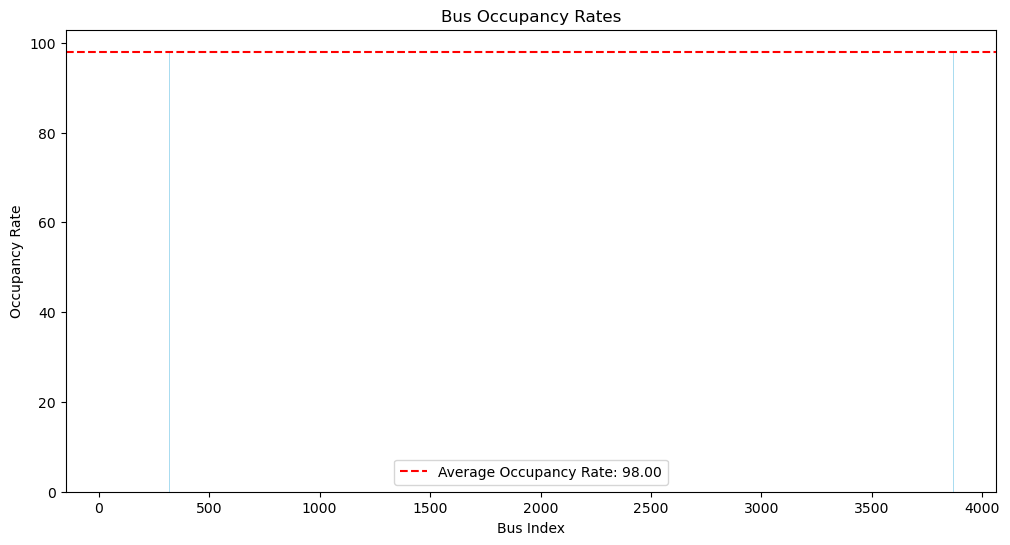

In [256]:
# Plotting the occupancy rates
plt.figure(figsize=(12, 6))
plt.bar(occupancy_df.index, occupancy_df['Occupancy_rate'], color='skyblue', alpha=0.7)
plt.axhline(y=occupancy_df['Occupancy_rate'].mean(), color='r', linestyle='--', label=f'Average Occupancy Rate: {occupancy_df["Occupancy_rate"].mean():.2f}')
plt.xlabel('Bus Index')
plt.ylabel('Occupancy Rate')
plt.title('Bus Occupancy Rates')
plt.legend()
plt.show()
